# KerasによるDeep Neural Network実装(MNIST)
PythonのDeep Learningライブラリ Kerasを用いてDeep Neural Networkの実装をします．

In [1]:
# ディープラーニングモジュール
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# 行列/ベクトル計算モジュール
import numpy as np

# 可視化モジュール
import matplotlib.pyplot as plt
import seaborn as sns

# モデルの読み書きモジュール
import h5py

# Juputer Notebookで画像を表示するためのコマンド
%matplotlib inline

Using TensorFlow backend.


- `keras.layers` からは，ディープラーニングで用いることのできる様々なレイヤーをimportできます．特に基本的なレイヤーは，`keras.layers.core`にまとめられています．詳細は公式リファレンスを参照してください．

Core Layers: https://keras.io/ja/layers/core/

## 1. データの準備

- MNISTをはじめ，いくつかのデータセットはKerasからimportすることができます．


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- ほとんどの場合，データセットの前処理が必要です．ロードしたデータのshapeを確認し，学習に適した形式に変換します．

In [3]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
# 28x28 の行列を 784x1 のベクトルに変換してください 

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

- 画素値の正規化を行います．通常$0-255$の値をとる画素値を，$0-1$の範囲に変換します．

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

- クラス分類タスクでは，正解ラベルをOne-hot Label形式で表現します．kerasでは，`keras.utils.to_categorical`関数で変換できます．

In [6]:
# 変換前

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
# 変換後

y_train[:10]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

- 最後に，データセットの次元を確認します．

In [9]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (60000, 784)
y_train: (60000, 10)
x_test: (10000, 784)
y_test: (10000, 10)


## 2. モデル構築

- SequentialモデルでDNNを構築します．`model = Sequential()`でSequentialモデルを宣言します．
- 一つのレイヤーは`Dense`レイヤーを追加することで実装できます．`Dense`では，ユニット数と活性化を指定できます．
- 一番初めの層だけは`input_shape`引数が必要です．入力の次元を指定します．

In [30]:
#モデル構築
model = Sequential()

# 以下のモデル構築を変化させて試してみてください。
model.add(Dense(256, input_shape=(28*28,)))

model.add(Dense(20, activation="sigmoid"))
model.add(Dropout(0.2))

# 出力層
model.add(Dense(10, activation="softmax"))

- `model.summary()`関数で，構築したモデルの概要が確認できます．

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 20)                5140      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
Total params: 206,310
Trainable params: 206,310
Non-trainable params: 0
_________________________________________________________________


- 構築したモデルをコンパイルします．コンパイルには，損失関数，最適化手法と評価関数が設定できます．
- 損失関数は次のものが使用できます: https://keras.io/ja/losses/
- 最適化手法は次のものが使用できます: https://keras.io/ja/optimizers/
- 評価関数は，未指定の場合はlossが採用されます．その他いくつか使用可能なものがありますが，一般にはaccuracyを用いると良いでしょう．

In [32]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

- バッチサイズ，エポック数を指定し，`model.fit`関数で学習を開始できます．
- `model.fit`をもう一度実行すると，前回の学習状態からスタートします．リセットしたい場合は，`model.reset_states()`を再実行してから`model.fit`を実行します．

In [33]:
# 以下の数字を変えて試してみてください。

# バッチサイズ
batch_size = 1000

# エポック数
epochs = 10

In [34]:
# フィッティング(学習)
history = model.fit(x_train, y_train,
                                   batch_size=batch_size,
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 1.5511 - acc: 0.5913 - val_loss: 1.1133 - val_acc: 0.8251
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 1.0498 - acc: 0.7952 - val_loss: 0.8548 - val_acc: 0.8670
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.8615 - acc: 0.8306 - val_loss: 0.6978 - val_acc: 0.8862
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.7392 - acc: 0.8490 - val_loss: 0.5927 - val_acc: 0.8933
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.6561 - acc: 0.8596 - val_loss: 0.5218 - val_acc: 0.8970
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.5953 - acc: 0.8662 - val_loss: 0.4675 - val_acc: 0.9055
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.5482 - acc: 0.8730 - val_loss: 0.4283 - val_acc: 0.9094
Epoch 8/10
60000/60000 [==============================] - 2s 

- `model.evaluate`関数によって現在のモデルの精度が確認できます．

In [29]:
# テストスコアの計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

 9792/10000 [============================>.] - ETA: 0sTest loss: 0.702773520756
Test accuracy: 0.8731


## 3. モデルの評価

## 3-1. 学習過程の可視化

- エポックごとのLossとAccuracyを可視化します．
- 過学習やUnder Fittingの確認をすることができます．

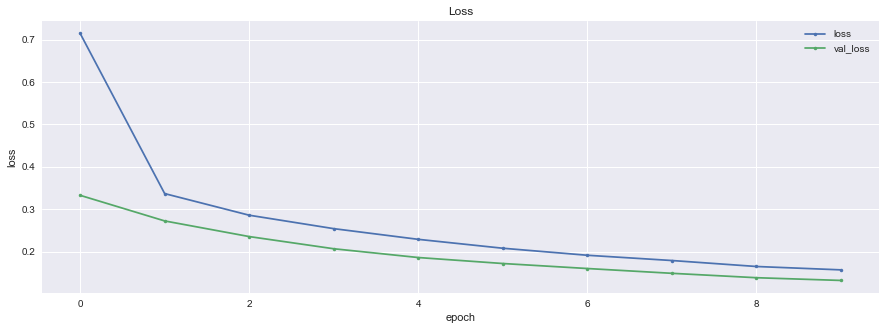

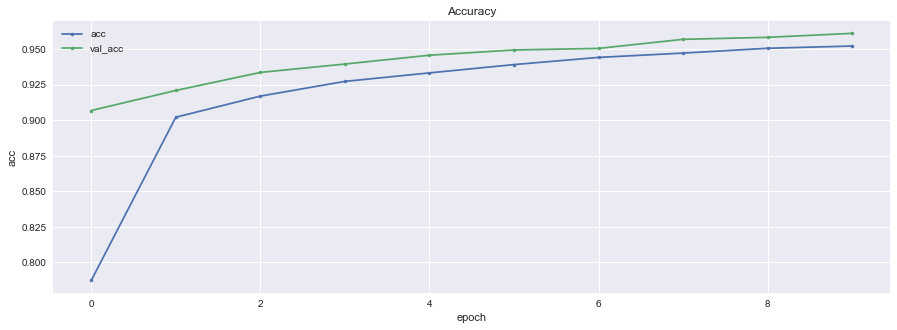

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(15,5))
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.figure(figsize=(15,5))
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

## 3-2. モデルの保存

- `model.save`で，現在のモデルを保存できます．

In [17]:
model.save("nn_mnist.h5")

- 保存したモデルは以下のように呼び出せます．

In [18]:
# 保存したモデルを読み込む場合は実行
# model = keras.models.load_model('./mnist_data.h5')

# 4.モデルの利用

- 学習したモデルを使って，自由な画像を分類させます．
- 画像ファイルの読み込みは`PIL`ライブラリを用います．

In [19]:
from PIL import Image

#画像の読み込み
im = Image.open("./handwritten_3.jpg")

- 今回はグレースケール画像の学習を行ったため，入力画像もグレースケール変換します．`convert('L')`を用います．
- 学習には28x28画像を用いたので，入力画像も同じ解像度に変換します．`resize(28,28)`を用います．
- 画像データをnumpy配列に変換します．

In [20]:
# 画像を白黒に変換
gray_img = im.convert('L')

# 画像の解像度を変換
gray_img = gray_img.resize((28,28))

#画像をarrayに変換
im_list = np.array(gray_img, 'f')

- 学習には，黒地に白文字の画像を用いたので，入力画像によって白黒反転を行います．

In [21]:
##白地に黒文字の場合は実行
##白黒反転をし，正規化
im_list = 1 - im_list/255.

##黒地に白文字の場合はそのまま正規化
##正規化
#im_list = im_list/255.

- 画像の表示には`plt.imshow`を用います．

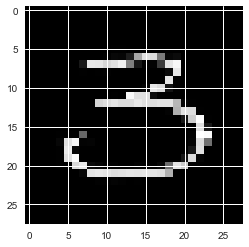

In [22]:
#入力画像の表示
plt.imshow(im_list,cmap=plt.get_cmap('gray'))

- 分類を行います．`model.predict`関数で，各クラスの分類確率を計算できます．
- 最後に，最も確率の高いクラスを分類結果として採用します．

In [23]:
test = im_list.reshape(1,784)
pred = model.predict(test)

print(pred)
print('\n')
print('Result:',np.argmax(pred[0]))

[[  1.02897696e-02   2.35228753e-03   2.15497054e-03   6.58750653e-01
    8.98444036e-04   2.94416457e-01   3.62156541e-03   5.62133035e-04
    1.39132040e-02   1.30405631e-02]]


Result: 3
